## Yield curve construction and interest rate modeling

A number of problems in portfolio management, trading, and risk management require a deep understanding and modeling of yield curves.  **Yield curve illustrates the “price of funds” at a given point in time and, due to the time value of money, often shows interest rates rising as a func‐ tion of maturity**. Researchers found that shifts or changes in the shape of the yield curve are attributable to a few unobservable factors. Specifically, by three factors, which are often referred to as **level, slope, and curvature**. Dimensionality reduction breaks down the movement of the yield curve into these three factors. Reducing the yield curve into fewer components means we can focus on a few intuitive dimensions in the yield curve. Traders and risk managers use this technique to condense the curve in risk factors for hedging the interest rate risk.

Our goal in this case study is to use dimensionality reduction techniques (PCA) to generate the typical movements of a yield curve. We use the data of 11 tenors (or maturities), from 1-month to 30-years, of Treasury curves. The data used for this case study is obtained from [Quandl](https://data.nasdaq.com/). Just create a free account to get the API-KEY.

In [ ]:
#pip install quandl
import quandl

#The API Key can be optained from Quandl website by registering. 
quandl.ApiConfig.api_key = 'YOUR API KEY'

treasury = ['FRED/DGS1MO',
           'FRED/DGS3MO',
           'FRED/DGS6MO',
           'FRED/DGS1',
           'FRED/DGS2',
           'FRED/DGS3',
           'FRED/DGS5',
           'FRED/DGS7',
           'FRED/DGS10',
           'FRED/DGS20',
           'FRED/DGS30']

treasury_df = quandl.get(treasury)
treasury_df.columns = ['TRESY1mo',
                    'TRESY3mo', 
                    'TRESY6mo',
                    'TRESY1y',
                    'TRESY2y',
                    'TRESY3y',
                    'TRESY5y',
                    'TRESY7y',
                    'TRESY10y',
                    'TRESY20y',
                    'TRESY30y']

dataset = treasury_df

### Exploratory Data Analysis

In [6]:
import pandas as pd
pd.set_option('display.width', 100)
dataset.tail(5)

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
2022-07-11,1.58,2.18,2.79,2.97,3.07,3.09,3.05,3.06,2.99,3.43,3.18
2022-07-12,1.63,2.22,2.78,3.07,3.03,3.07,3.01,3.01,2.96,3.37,3.13
2022-07-13,1.78,2.39,2.96,3.21,3.13,3.14,3.02,3.00,2.91,3.35,3.08
2022-07-14,1.99,2.40,2.93,3.16,3.15,3.16,3.06,3.05,2.96,3.36,3.11
2022-07-15,1.98,2.37,2.94,3.12,3.13,3.14,3.05,3.03,2.93,3.34,3.10


In [7]:
pd.set_option('display.max_rows', 500)
dataset.dtypes

TRESY1mo    float64
TRESY3mo    float64
TRESY6mo    float64
TRESY1y     float64
TRESY2y     float64
TRESY3y     float64
TRESY5y     float64
TRESY7y     float64
TRESY10y    float64
TRESY20y    float64
TRESY30y    float64
dtype: object

In [8]:
dataset.describe()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
count,5242.000000,10218.000000,10218.000000,15120.000000,11528.000000,15120.000000,15120.000000,13250.000000,15120.000000,13431.000000,11350.000000
mean,1.170775,3.754376,3.937178,4.906169,5.023472,5.319184,5.582422,5.936623,5.920548,5.949620,6.313106
std,1.442256,3.245828,3.358095,3.452431,3.803110,3.334202,3.200290,3.264632,2.991523,2.905706,3.052659
min,0.000000,0.000000,0.020000,0.040000,0.090000,0.100000,0.190000,0.360000,0.520000,0.870000,0.990000
25%,0.060000,0.510000,0.662500,2.110000,1.540000,2.640000,3.080000,3.080000,3.900000,4.040000,3.840000
50%,0.490000,3.515000,3.630000,4.980000,4.860000,5.360000,5.530000,6.090000,5.720000,5.470000,5.790000
75%,1.770000,5.760000,6.010000,6.870000,7.480000,7.310000,7.540000,7.890000,7.670000,7.460000,8.260000
max,5.270000,17.010000,17.430000,17.310000,16.950000,16.590000,16.270000,16.050000,15.840000,15.780000,15.210000


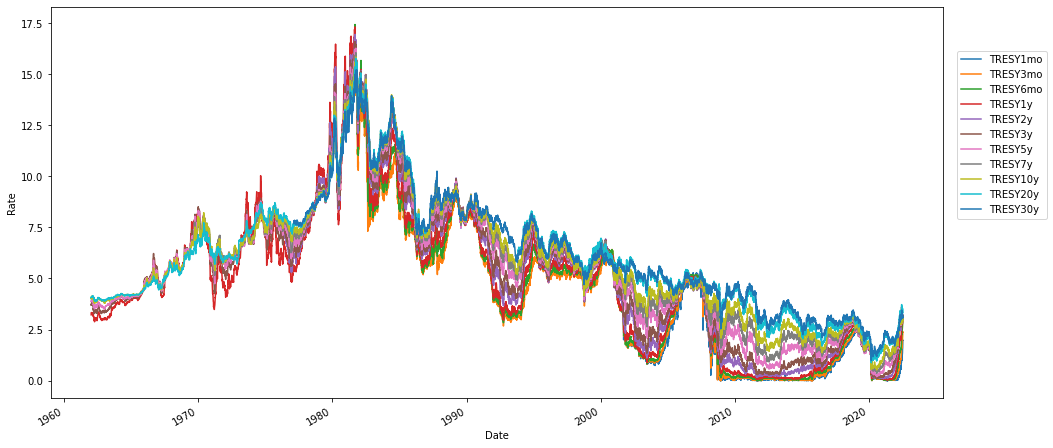

In [10]:
import matplotlib.pyplot as plt

dataset.plot(figsize=(16,8))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

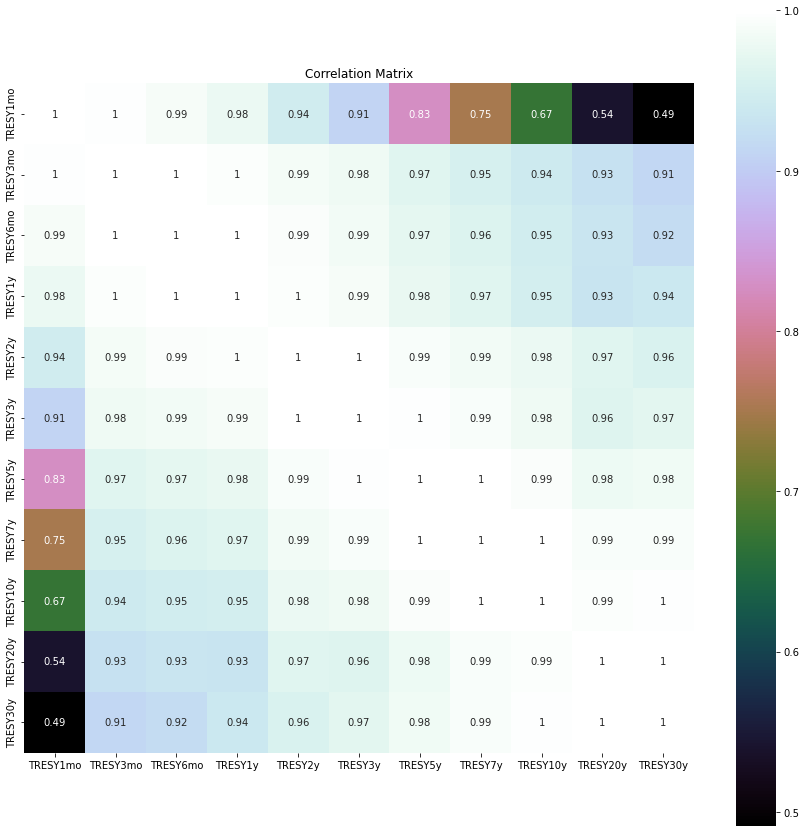

In [11]:
import seaborn as sns
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the picture above there is a significant positive correlation between the stocks.

### Data Preparation

#### Data cleaning
We check for the NAs in the data, either drop them or fill them with the mean of the column.

In [12]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [14]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')


# Drop the rows containing NA
dataset= dataset.dropna(axis=0)

#### Data transformation
All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result. We use StandardScaler in sklearn to standardize the dataset’s features onto unit scale (mean=0 and variance=1).

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(dataset)
rescaledDataset = pd.DataFrame(scaler.fit_transform(dataset),columns = dataset.columns, index = dataset.index)
# summarize transformed data
dataset.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)

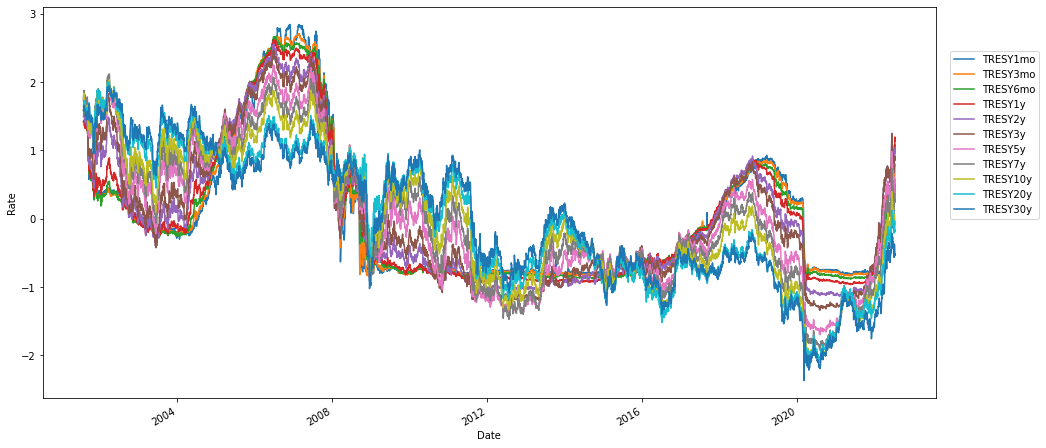

In [16]:
rescaledDataset.plot(figsize=(16,8))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

### Evaluate Algorithms and Models

As the next step We create a function to compute Principle Component Analysis from Sklearn. This function computes an inversed elbow chart that shows the amount of principle components and how many of them explain the variance treshold.

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
PrincipalComponent=pca.fit(rescaledDataset)

,Explained Variance_Top 5
0,84.55%
1,98.66%
2,99.75%
3,99.89%
4,99.94%


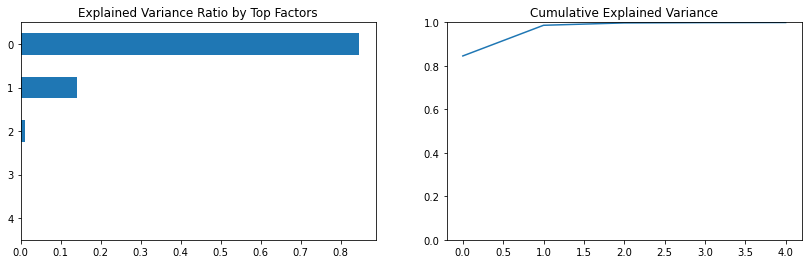

In [20]:
import numpy as np

NumEigenvalues=5
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes[0]);
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum().plot(ylim=(0,1),ax=axes[1], title='Cumulative Explained Variance');

# Explained variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance_Top 5').head(NumEigenvalues).style.format('{:,.2%}'.format)

The first principal component accounts for 84.4% of variance, with the second principal component getting 98.44% and the third 99.53%. The first 3 principal components account for, cumulatively, 99.5% of all movements in the data. Hence, in terms of dimensionality reduction, the first 3 principal components are representative of the data.

In [21]:
#  Function to determine the weights of each principal componen

def PCWeights(pca):
    '''
    Principal Components (PC) weights for each PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights


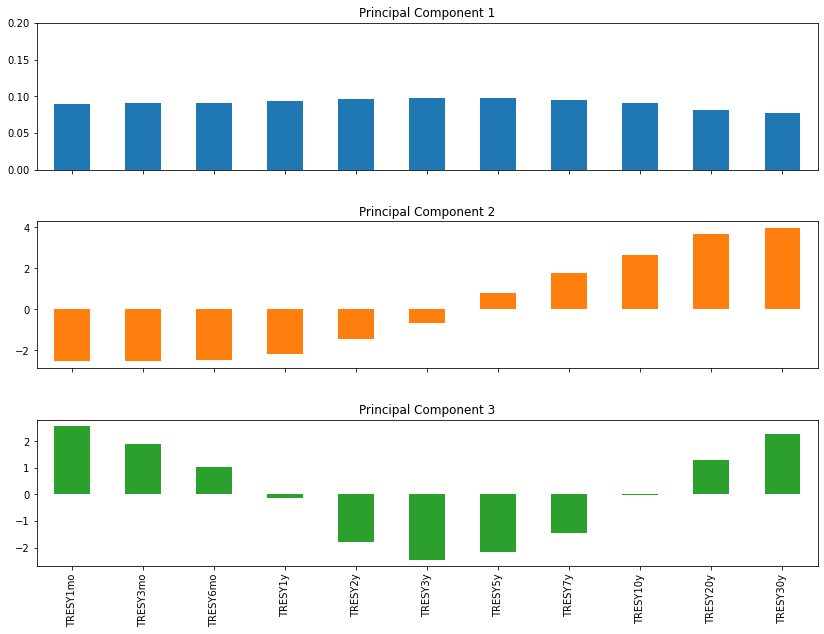

In [24]:
weights=PCWeights(pca)

NumComponents=3    
        
topPortfolios = pd.DataFrame(weights[:NumComponents], columns=dataset.columns)
topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,10))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(0, .2);

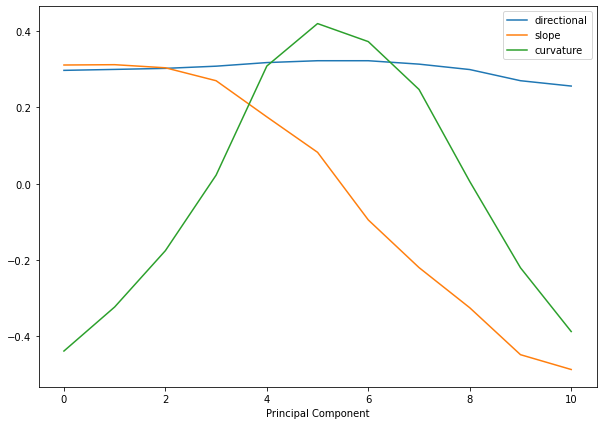

In [32]:
plt.figure(figsize=(10,7))
plt.plot(pca.components_[0:3].T, label=['directional','slope','curvature'])
plt.xlabel("Principal Component")
plt.legend()
plt.show()

Looking at the the interpretation of the first three principal components, they correspond to:

- Principal Component 1: **Directional movements** in the yield curve. These are movements that shift the entire yield curve up or down.

- Principal Component 2: **Slope movements** in the yield curve. These are movements that steepen or flatten (change the first derivative wrt maturity) the entire yield curve.

- Principal Component 3: **Curvature movements** in the yield curve. These are movements that change the curvature (or the second derivative wrt maturity) of the entire yield curve.

#### Reconstructing the curve using Principal Components

In [33]:
pca.transform(rescaledDataset)[:,:2]

array([[ 5.31850778, -0.38990995],
       [ 5.3766084 , -0.42173266],
       [ 5.47988965, -0.47908647],
       ...,
       [ 1.70510231,  1.55535339],
       [ 1.7875796 ,  1.54911187],
       [ 1.7419175 ,  1.55562423]])

Using the simple matrix reconstruction, **we can generate an approximation/almost exact replica of the initial data**.

Mechanically PCA is just a matrix multiplication:

**Y=XW**,

where Y is your principal components, X is input data, and W is a matrix of coefficients.

The only trick here is that your matrix of coefficients is quite special: you can use it to recover the original matrix.

**X=YW′**,

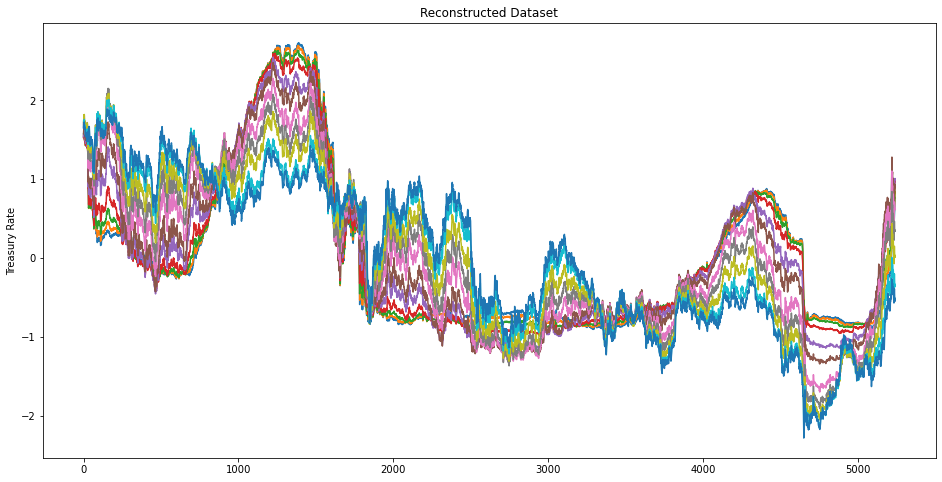

In [35]:
nComp=3
reconst= pd.DataFrame(np.dot(pca.transform(rescaledDataset)[:,:nComp], pca.components_[:nComp,:]),columns=dataset.columns)
plt.figure(figsize=(16,8))
plt.plot(reconst)
plt.ylabel("Treasury Rate")
plt.title("Reconstructed Dataset")
plt.show()

**Using just the first three principal components, we are able to replicate the original chart. Despite reducing the data from 11 dimensions to three, we still retain more than 99% of the information and can reproduce the original data easily**.
So we demonstrated the *efficiency of dimensionality reduction and principal components analysis in reducing the number of dimension and coming up with new intuitive feature*. In order to hedge a portfolio, it may be sufficient to protect the portfolio against moves in the first three principal components only.

The first three principal components explain more than 99.5% of the variation and represent directional movements, slope movements, and curvature movements respectively. Overall, by using principal component analysis, analyzing the eigen vectors and understanding the intuition behind them, we demonstrated how the implementation of a dimensionality reduction lead to fewer intuitive dimensions in the yield curve.